In [2]:
!pip install eli5
!pip install shap
!pip install lime

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import * #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
from sklearn.inspection import PartialDependenceDisplay
import shap #for SHAP values
shap.initjs()
import sklearn.inspection
import lime
from lime import lime_tabular
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

c:\Users\Carly\anaconda3\envs\faster-rcnn\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dt = pd.read_csv("../data/2.remove_unbalance_missing_data/1_1.csv")
dt.drop(['Unnamed: 0'], axis = 1, inplace = True)
dt.head(10)

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  GB  SIM_GIPERT  \
0   77    1         2          1          1         2   3           0   
1   55    1         1          0          0         0   0           0   
2   52    1         0          0          0         2   2           0   
3   68    0         0          0          0         2   2           0   
4   60    1         0          0          0         2   3           0   
5   64    1         0          1          2         1   0           0   
6   70    1         1          1          2         1   2           0   
7   65    1         0          1          1         2   2           0   
8   60    1         0          0          0         2   2           0   
9   77    0         2          0          0         0   3           0   

   DLIT_AG  ZSN_A  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
0        7      0  ...           0           0           0        1   
1        0      0  ...           1           0           0        1   
2        2      0  ...           3           2           2        1   
3        3      1  ...           0           0           0        0   
4        7      0  ...           0           0           0        0   
5        0      0  ...           0           0           0        0   
6        7      1  ...           0           0           0        0   
7        7      0  ...           0           0           0        0   
8        6      0  ...           0           0           0        1   
9        6      1  ...           1           0           0        0   

   B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
0           0           0          1        1         0          0  
1           0           1          1        1         0          1  
2           1           0          1        1         0          0  
3           0           1          1        1         0          0  
4           0           1          0        1         0          1  
5           1           0          1        1         0          0  
6           0           0          1        1         0          1  
7           0           1          1        1         0          0  
8           0           0          0        1         0          0  
9           0           1          0        0         0          0  

[10 rows x 73 columns]

In [5]:
target = pd.read_csv("../data/0.origin_data/target.csv")
target.drop(['Unnamed: 0'], axis = 1, inplace = True)
target.head(10)

FIBR_PREDS  PREDS_TAH  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  RAZRIV  \
0           0          0          0           0         0          0       0   
1           0          0          0           0         0          0       0   
2           0          0          0           0         0          0       0   
3           0          0          0           0         0          0       0   
4           0          0          0           0         0          0       0   
5           1          0          0           0         0          0       0   
6           0          0          0           0         0          0       0   
7           0          0          0           0         0          0       0   
8           1          0          0           0         0          0       0   
9           0          0          0           0         0          0       0   

   DRESSLER  ZSN  REC_IM  P_IM_STEN  LET_IS  
0         0    0       0          0       0  
1         0    0       0          0       0  
2         0    0       0          0       0  
3         0    1       0          0       0  
4         0    0       0          0       0  
5         0    0       0          0       0  
6         0    1       0          0       0  
7         0    0       0          0       0  
8         0    0       0          0       0  
9         0    1       0          0       0

# 2-1. FIBR_PREDS (심방세동) 관련 shap

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['FIBR_PREDS'], test_size = 0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [7]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

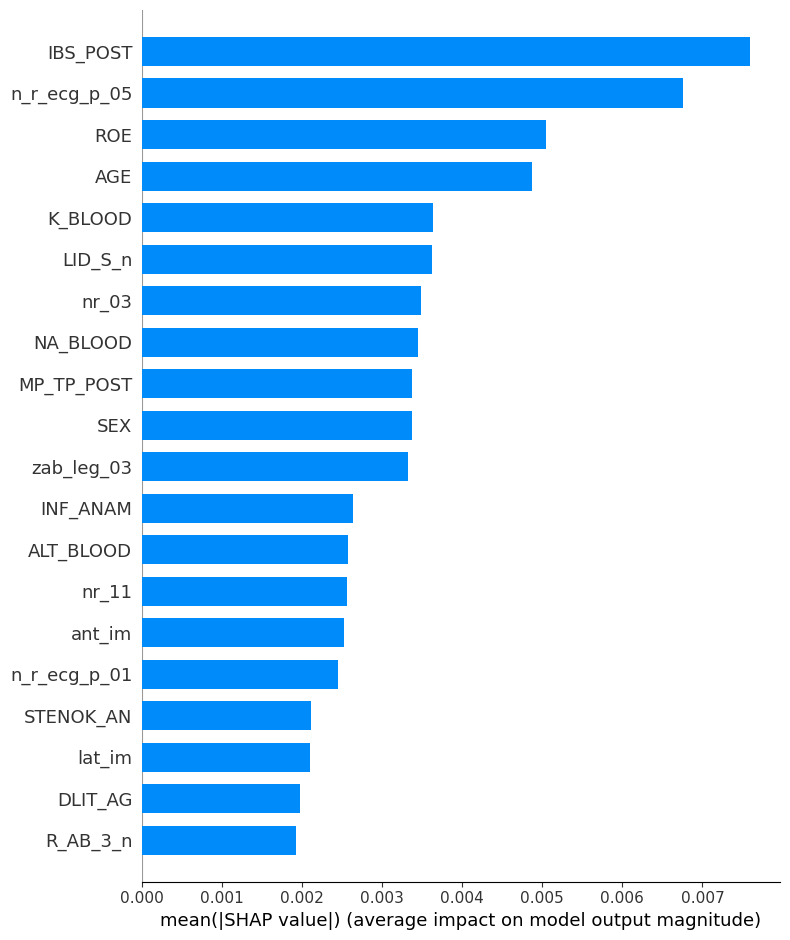

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

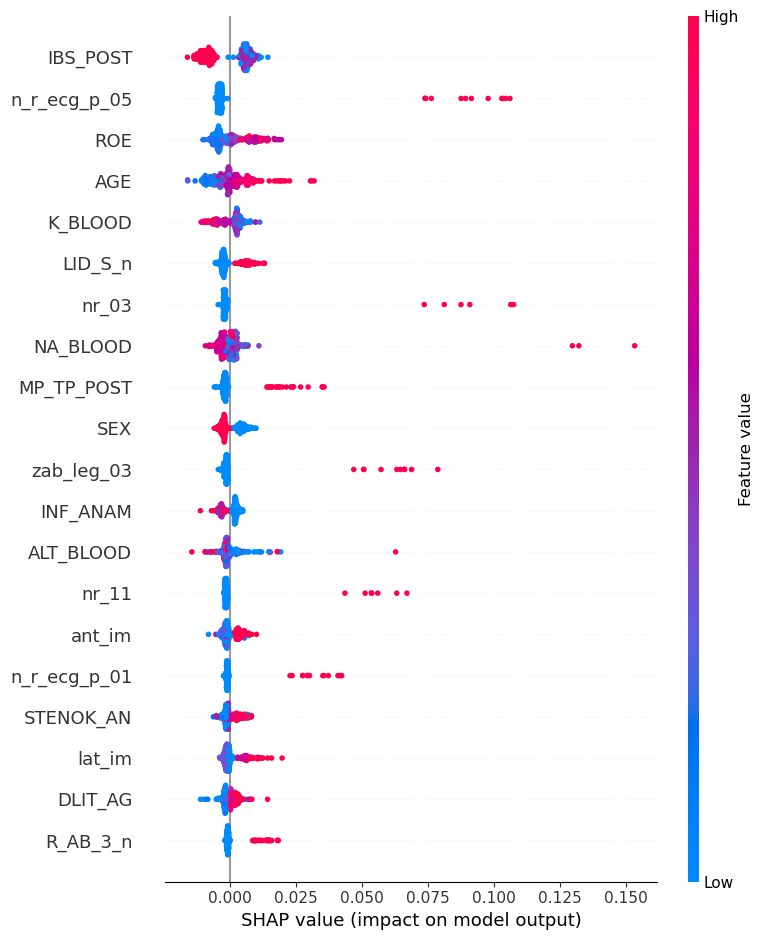

In [9]:
shap.summary_plot(shap_values[1], X_test)

In [10]:
def heart_disease_risk_factors(model, patient):
    explainer = shap.TreeExplainer(model)
    shap.initjs()
    shap_values = explainer.shap_values(patient)
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [11]:
X_test.head(20)

AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  GB  SIM_GIPERT  \
1377   90    0         1          6          2         1   2           0   
819    88    0         0          0          0         0   0           0   
1304   85    0         0          0          0         0   0           0   
881    52    1         1          0          0         0   0           1   
1535   77    1         1          5          2         2   2           0   
115    59    0         0          0          0         0   2           0   
188    64    1         0          0          0         2   3           0   
781    66    0         1          1          2         1   2           0   
792    70    1         1          6          2         2   0           0   
1521   69    1         1          1          2         0   2           0   
1005   70    1         0          6          2         2   0           0   
74     61    1         0          0          0         2   0           0   
1063   77    1         0          3          1         1   0           0   
481    49    1         0          0          0         0   0           0   
1614   65    1         3          6          2         2   0           0   
905    51    1         0          0          0         0   0           1   
1429   56    0         0          0          0         0   2           0   
486    38    1         1          6          2         1   0           0   
1688   77    1         1          5          2         2   2           0   
379    62    1         0          3          1         2   3           0   

      DLIT_AG  ZSN_A  ...  NOT_NA_1_n  NOT_NA_2_n  NOT_NA_3_n  LID_S_n  \
1377        7      0  ...           0           0           0        0   
819         0      0  ...           1           0           0        0   
1304        0      0  ...           0           0           0        1   
881         6      0  ...           0           0           0        0   
1535        6      2  ...           0           2           2        0   
115         6      0  ...           0           0           0        1   
188         7      0  ...           0           0           0        1   
781         6      0  ...           0           0           0        0   
792         0      0  ...           0           0           0        0   
1521        3      0  ...           0           0           0        0   
1005        0      0  ...           0           0           0        1   
74          0      0  ...           0           0           0        0   
1063        0      0  ...           0           0           0        0   
481         0      0  ...           0           0           0        0   
1614        0      1  ...           0           0           0        0   
905         6      0  ...           0           0           0        0   
1429        6      0  ...           0           0           0        0   
486         0      0  ...           1           0           0        0   
1688        7      2  ...           0           0           0        0   
379         7      0  ...           0           0           0        0   

      B_BLOK_S_n  ANT_CA_S_n  GEPAR_S_n  ASP_S_n  TIKL_S_n  TRENT_S_n  
1377           0           1          1        1         0          0  
819            0           1          1        1         0          0  
1304           0           1          1        0         0          0  
881            0           0          0        0         0          1  
1535           1           1          1        1         0          0  
115            1           0          1        1         0          0  
188            0           1          1        1         0          0  
781            0           0          1        1         0          0  
792            0           0          1        1         0          1  
1521           0           0          1        0         0          0  
1005           0           1          1        1         0    

In [12]:
y_test.head(20)

1377    1
819     0
1304    1
881     0
1535    0
115     1
188     0
781     0
792     0
1521    0
1005    1
74      0
1063    0
481     0
1614    1
905     0
1429    0
486     0
1688    1
379     0
Name: FIBR_PREDS, dtype: int64

In [13]:
data_for_prediction = X_test.iloc[15,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 2. PREDS_TAH (상심실성 빈맥) shap

In [14]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['PREDS_TAH'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [15]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

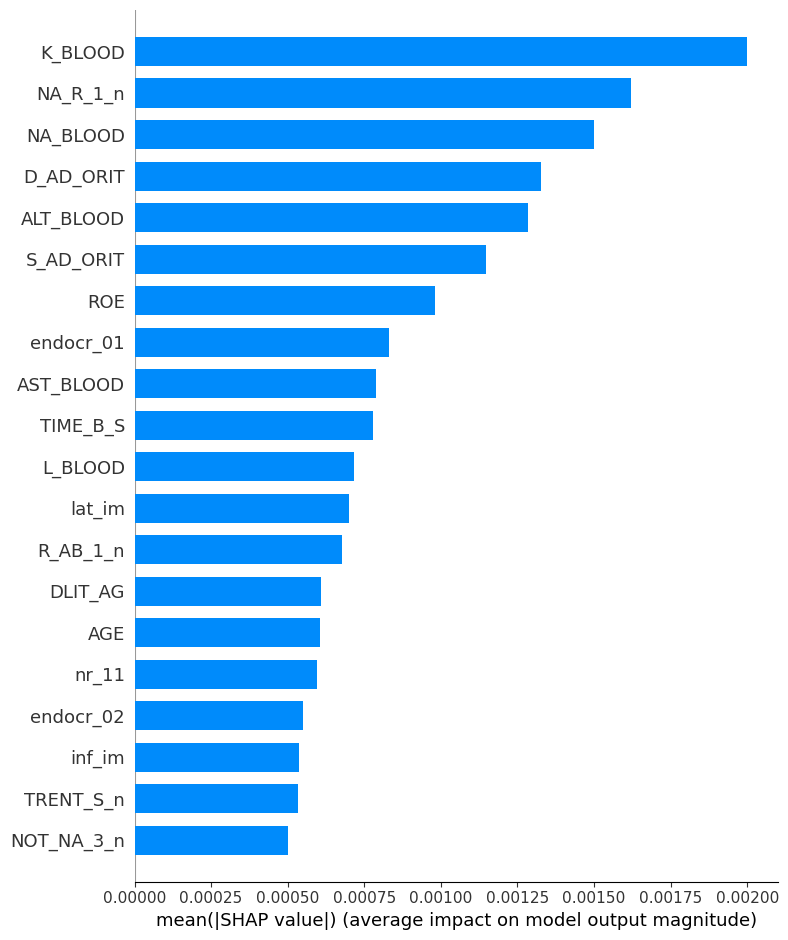

In [16]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

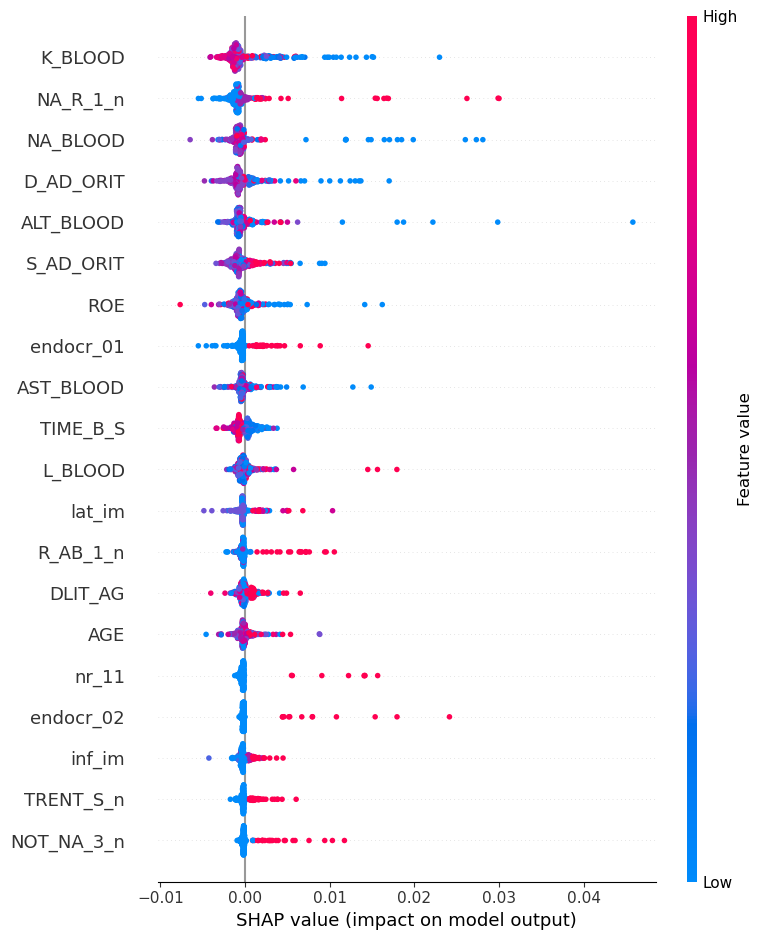

In [17]:
shap.summary_plot(shap_values[1], X_test)

In [18]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [19]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 3. JELUD_TAH (심실성 빈맥) shap

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['JELUD_TAH'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [22]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

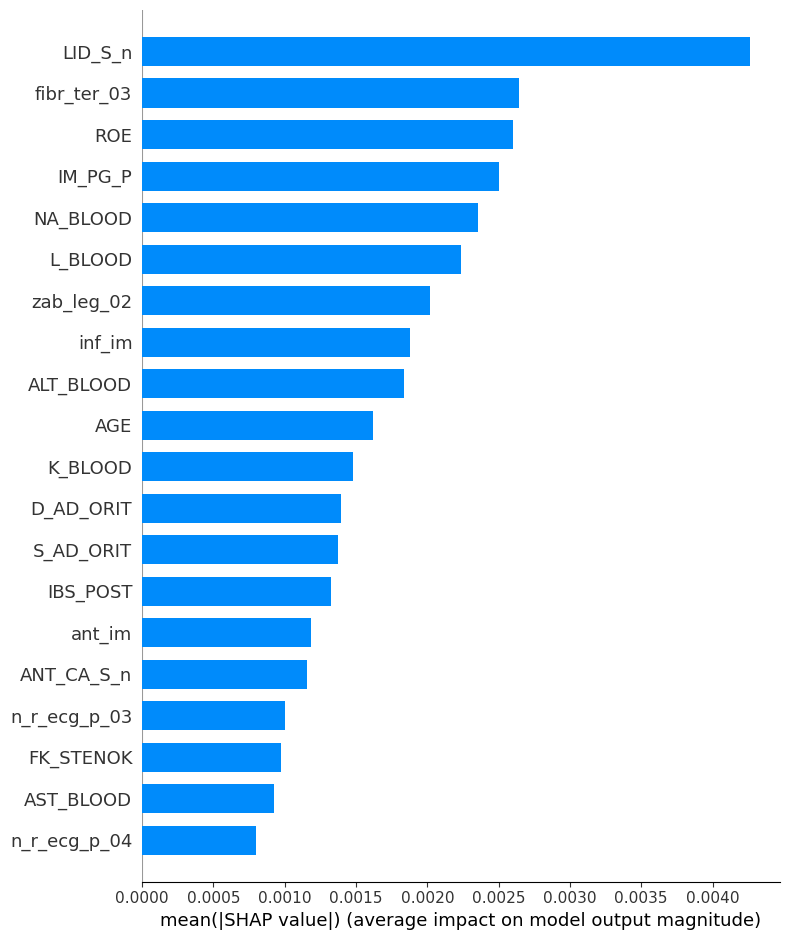

In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

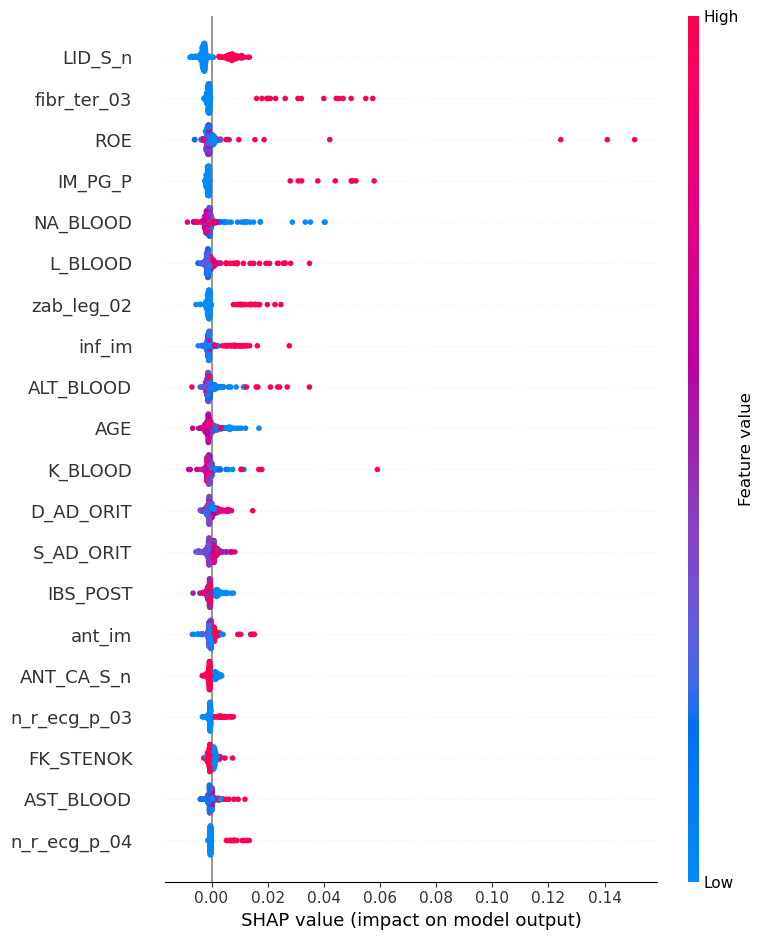

In [24]:
shap.summary_plot(shap_values[1], X_test)

In [25]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 4. FIBR_JELUD (심실 세동) shap

In [26]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['FIBR_JELUD'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [27]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

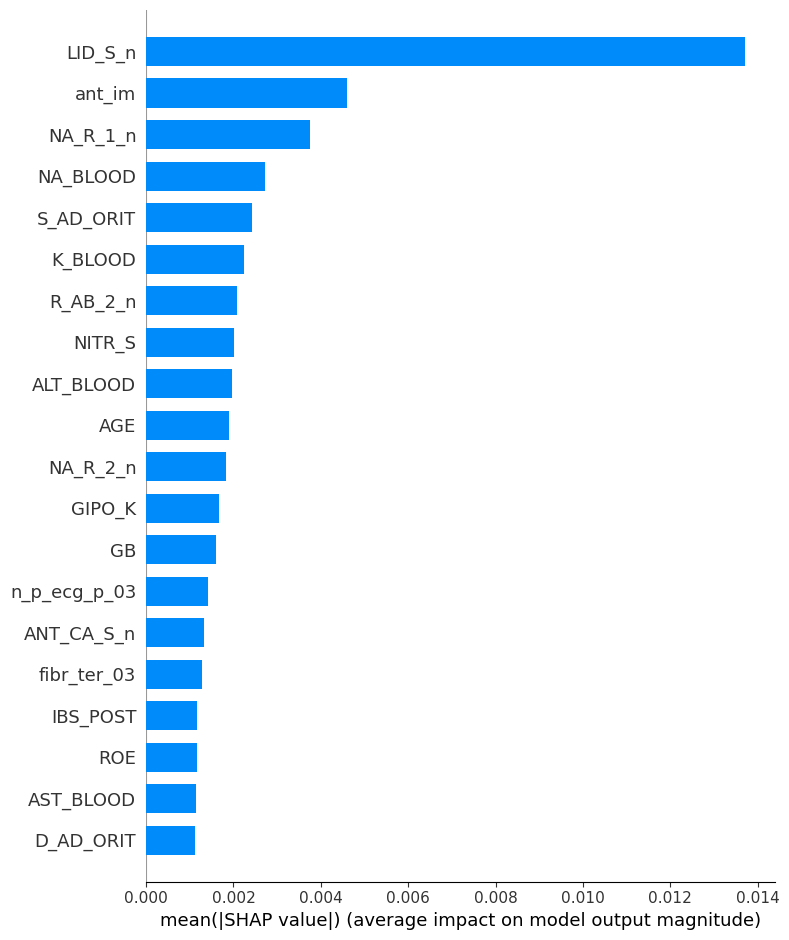

In [28]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

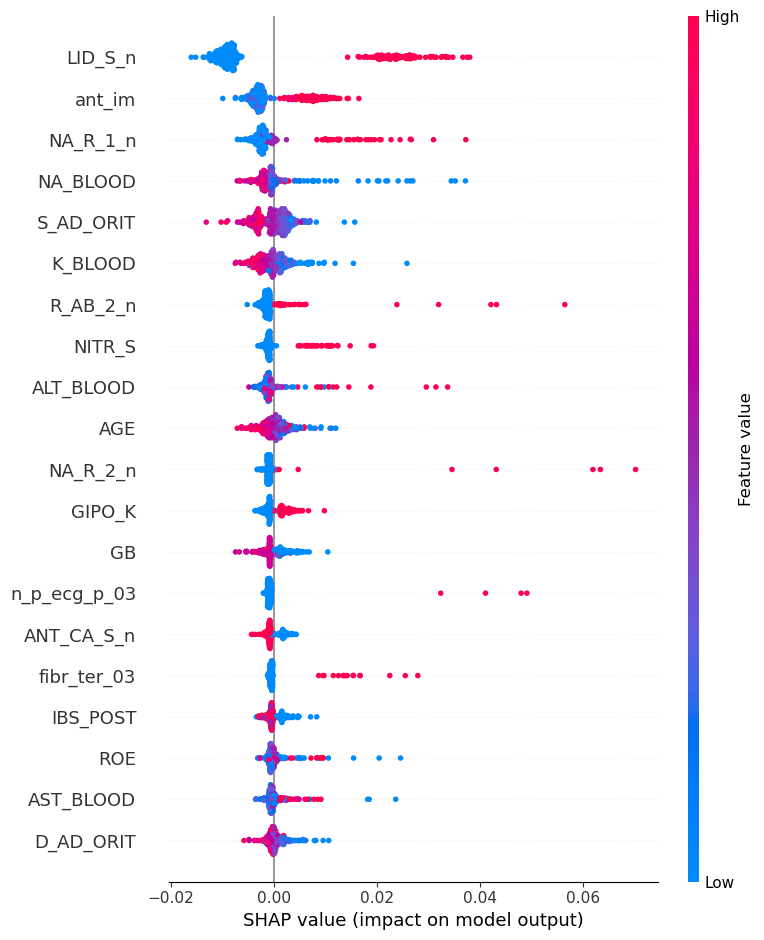

In [29]:
shap.summary_plot(shap_values[1], X_test)

In [30]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 5. A_V_BLOK (3도 AV 차단) shap

In [32]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['A_V_BLOK'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [33]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

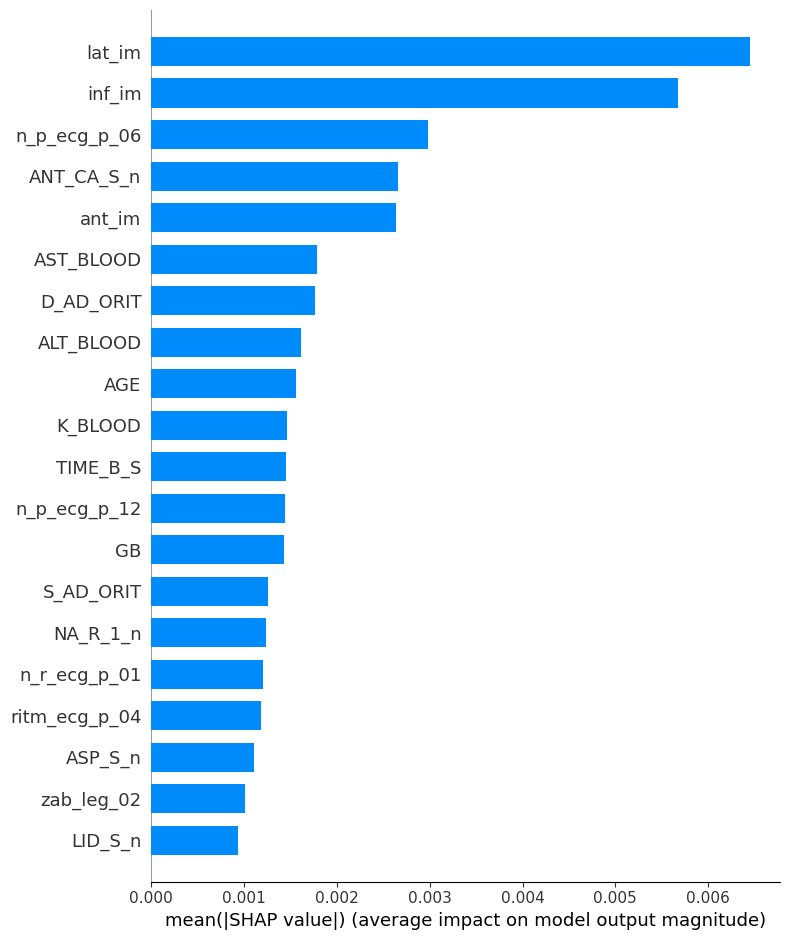

In [34]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

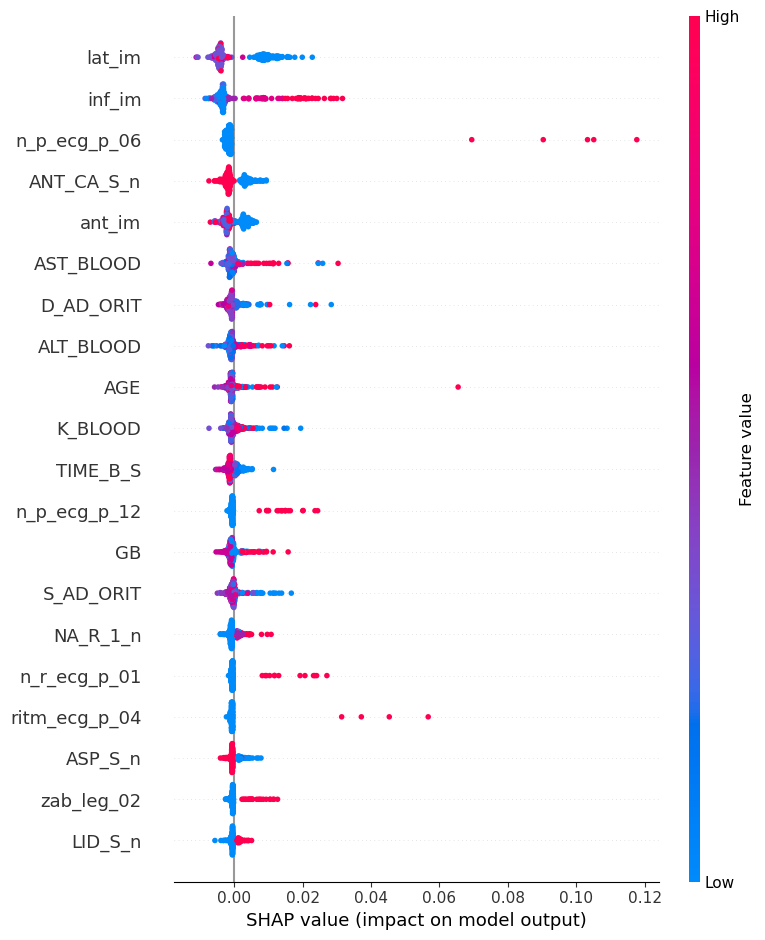

In [35]:
shap.summary_plot(shap_values[1], X_test)

In [37]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 6. OTEK_LANC (폐부종) shap

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['OTEK_LANC'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [39]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

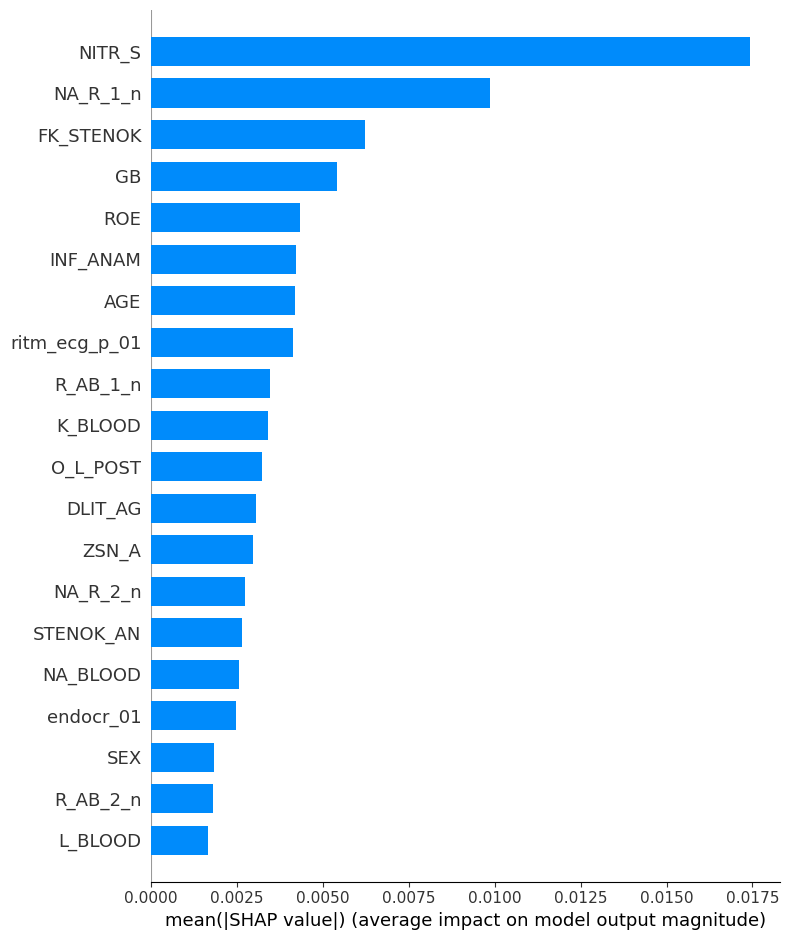

In [40]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

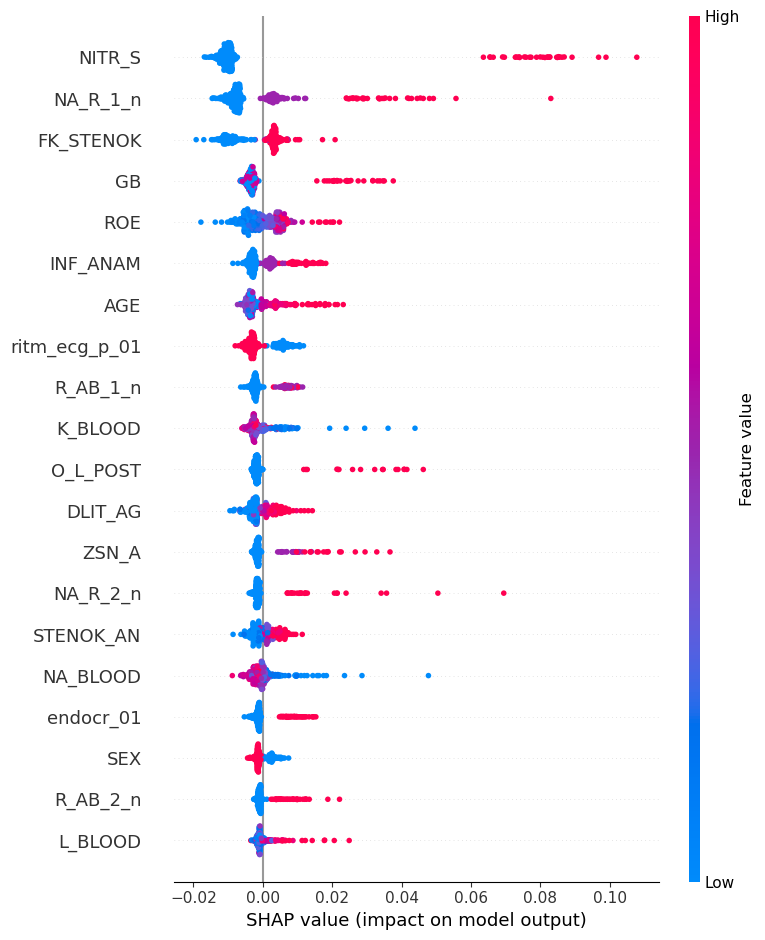

In [41]:
shap.summary_plot(shap_values[1], X_test)

In [43]:
data_for_prediction = X_test.iloc[10,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 7. RAZRIV (심근 파열) shap

In [44]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['RAZRIV'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [45]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

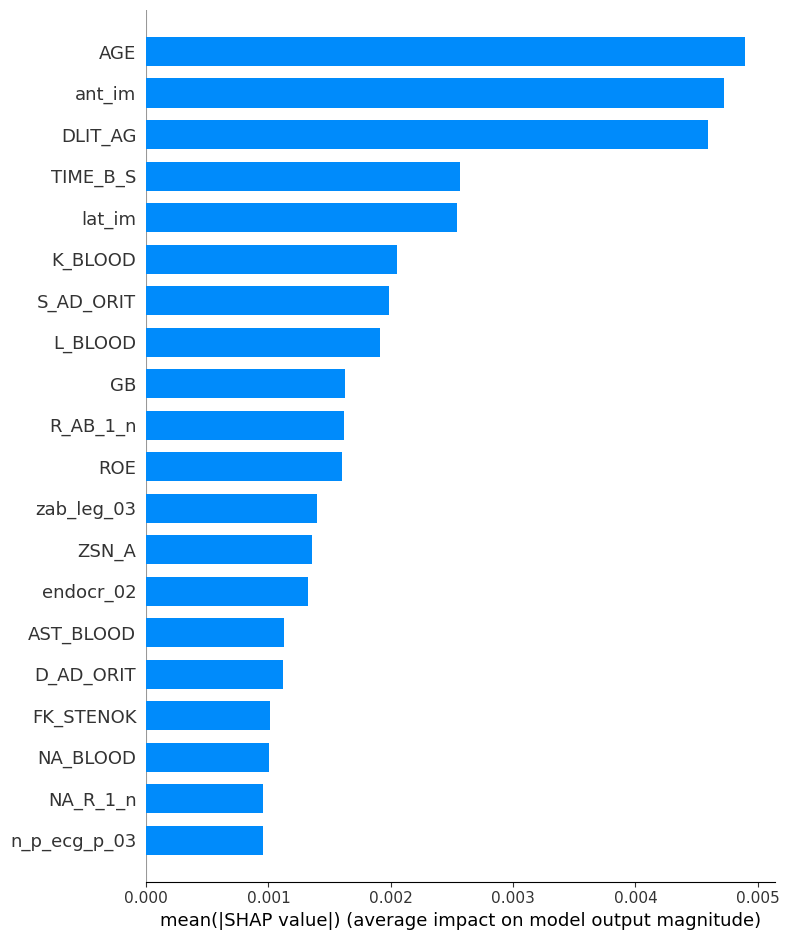

In [46]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

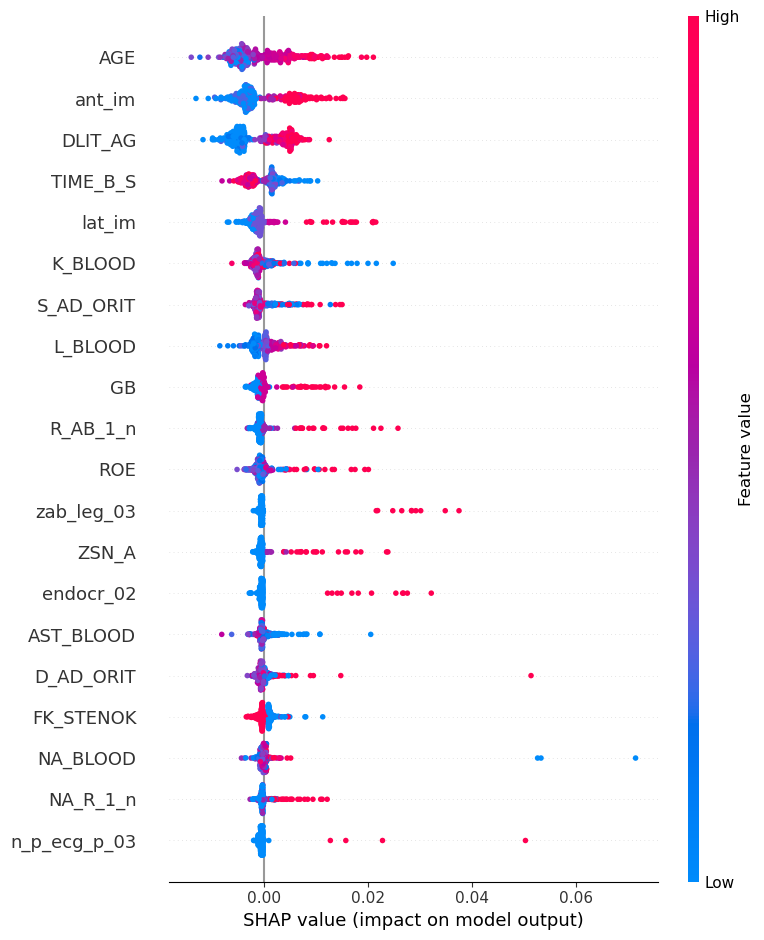

In [47]:
shap.summary_plot(shap_values[1], X_test)

In [48]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 8. DRESSLER (드레슬러 증후군) shap

In [49]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['DRESSLER'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [50]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

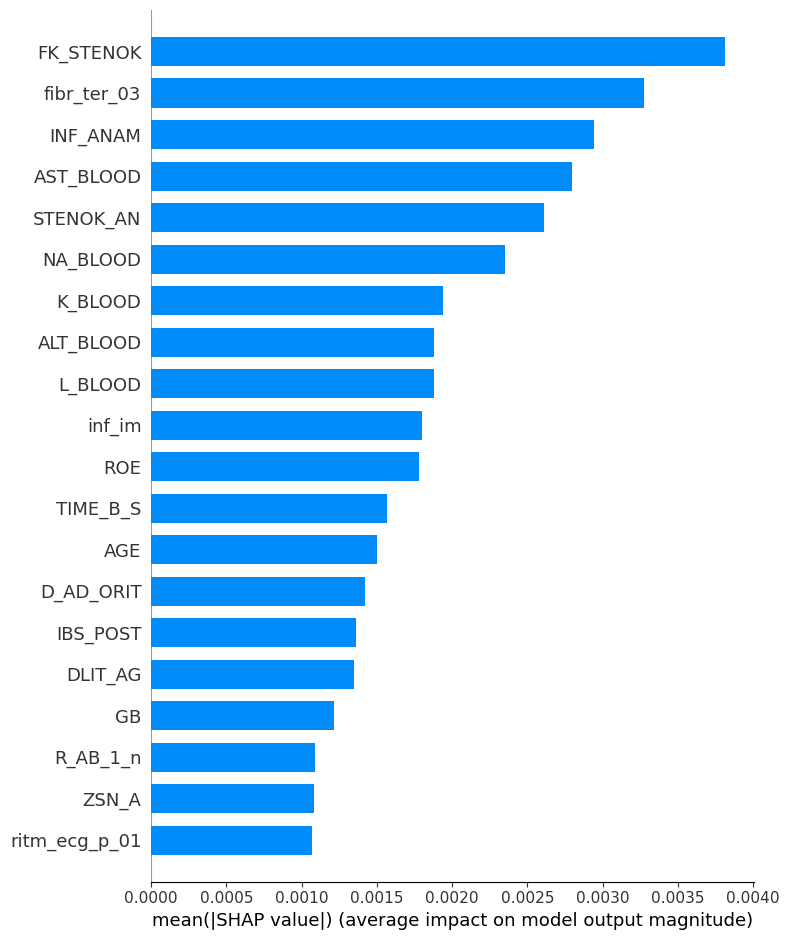

In [51]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

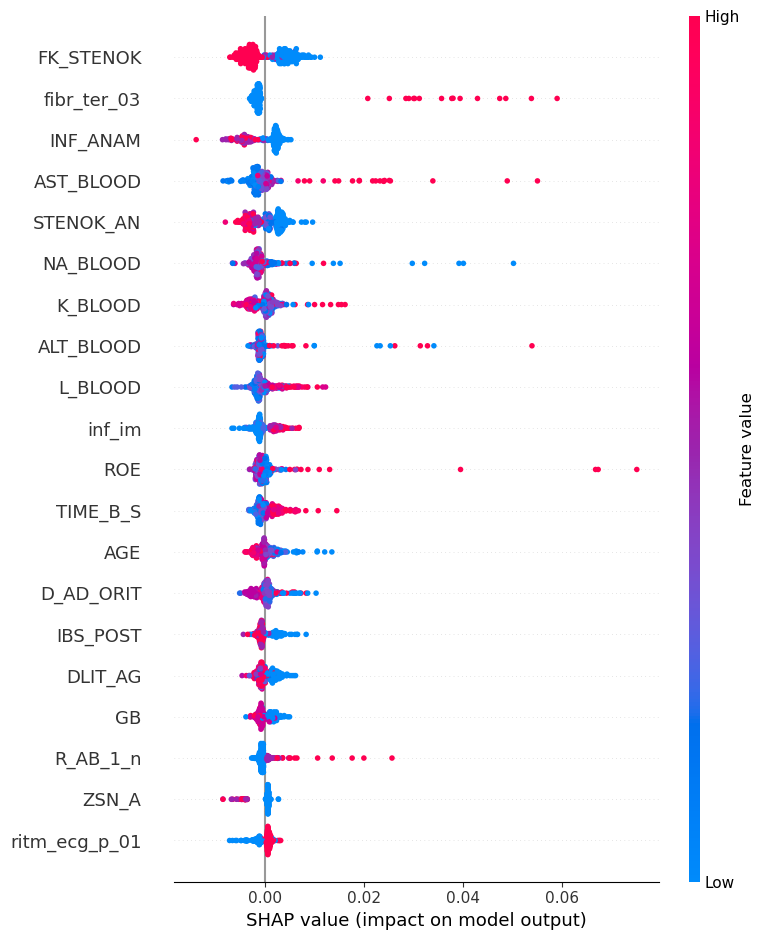

In [52]:
shap.summary_plot(shap_values[1], X_test)

In [53]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 9. ZSN (만성 심부전) shap

In [54]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['ZSN'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [55]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

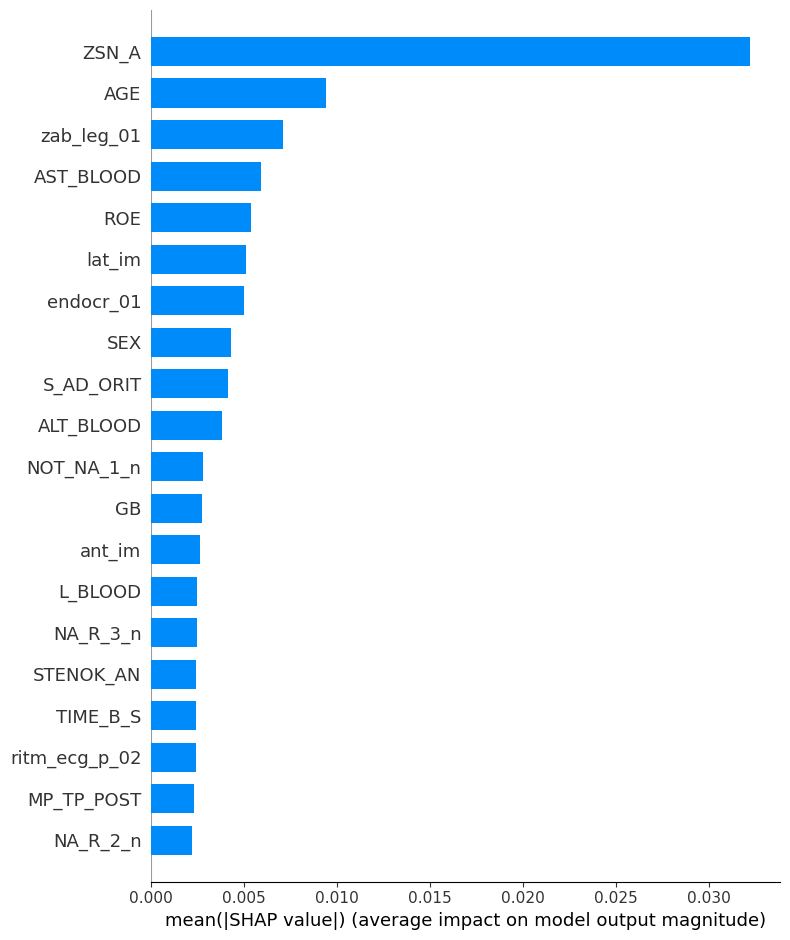

In [56]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

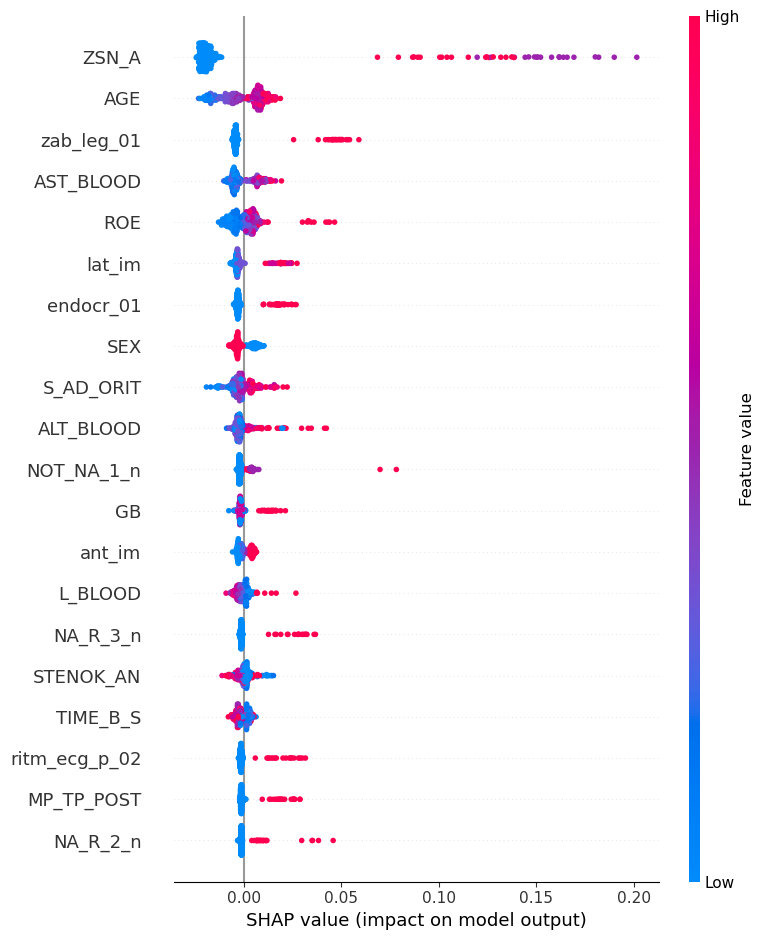

In [57]:
shap.summary_plot(shap_values[1], X_test)

In [59]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 10. REC_IM (심근경색 재발) shap

In [60]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['REC_IM'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [61]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

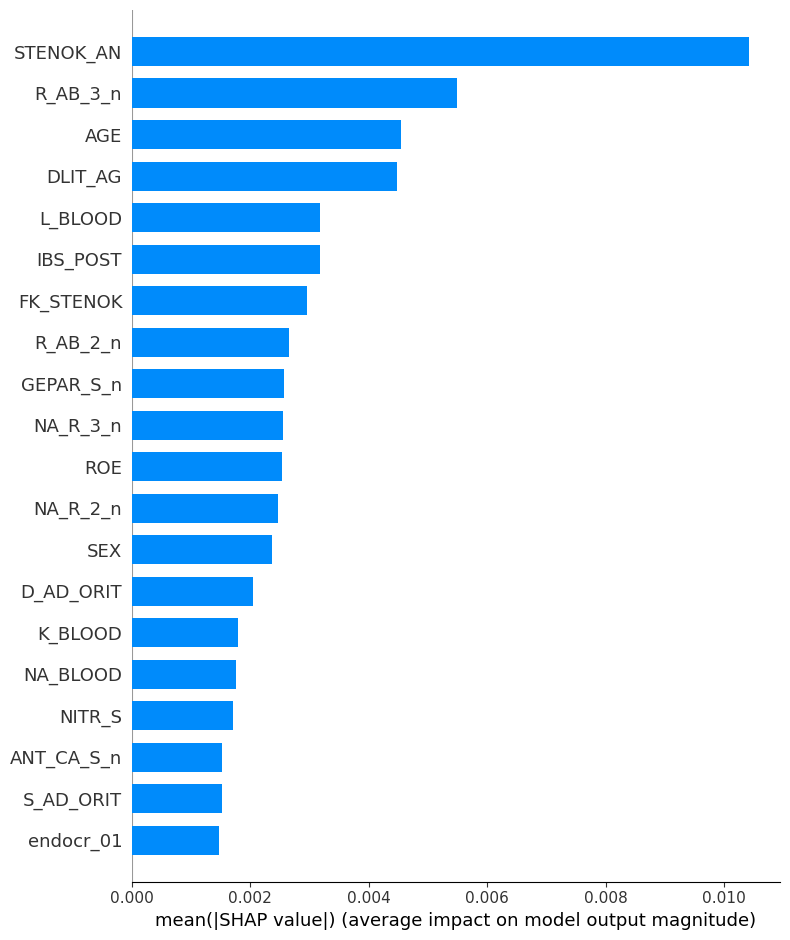

In [62]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

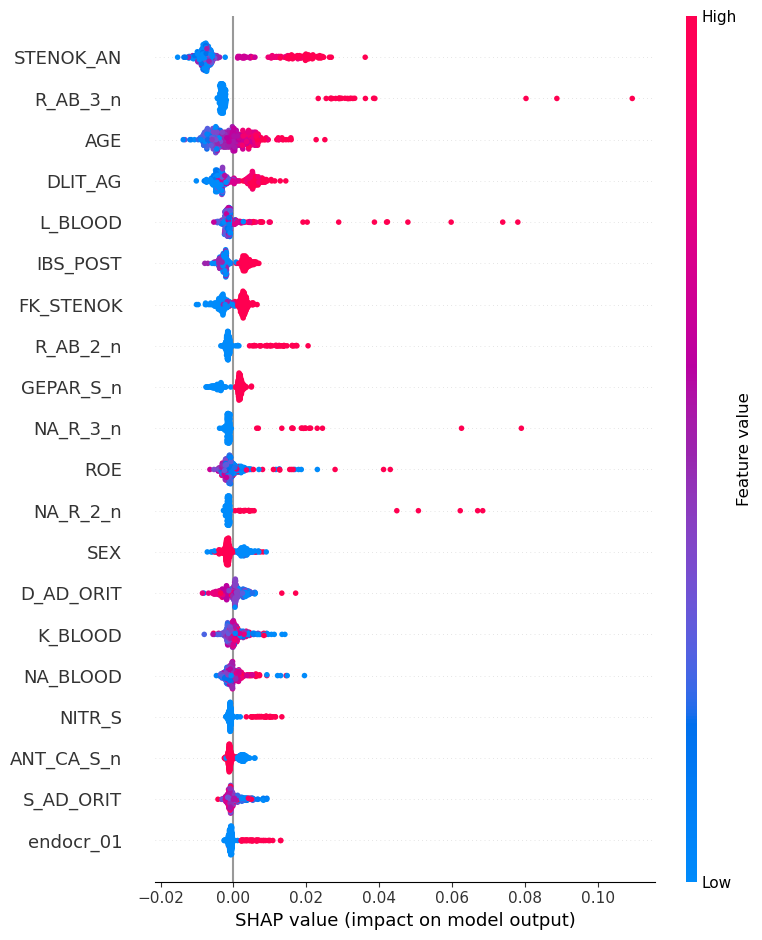

In [63]:
shap.summary_plot(shap_values[1], X_test)

In [64]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

# 11. P_IM_STEN (심근경색 후 협심증) shap

In [65]:
X_train, X_test, y_train, y_test = train_test_split(dt, target['P_IM_STEN'], test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1360, 73), (340, 73), (1360,), (340,))

In [66]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

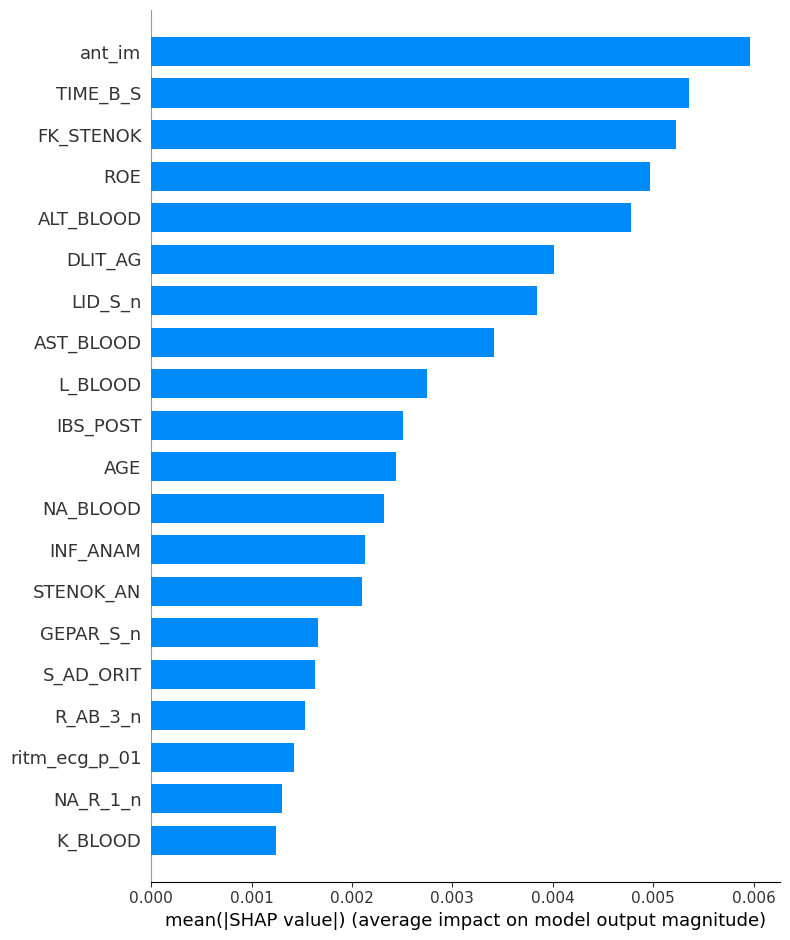

In [67]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

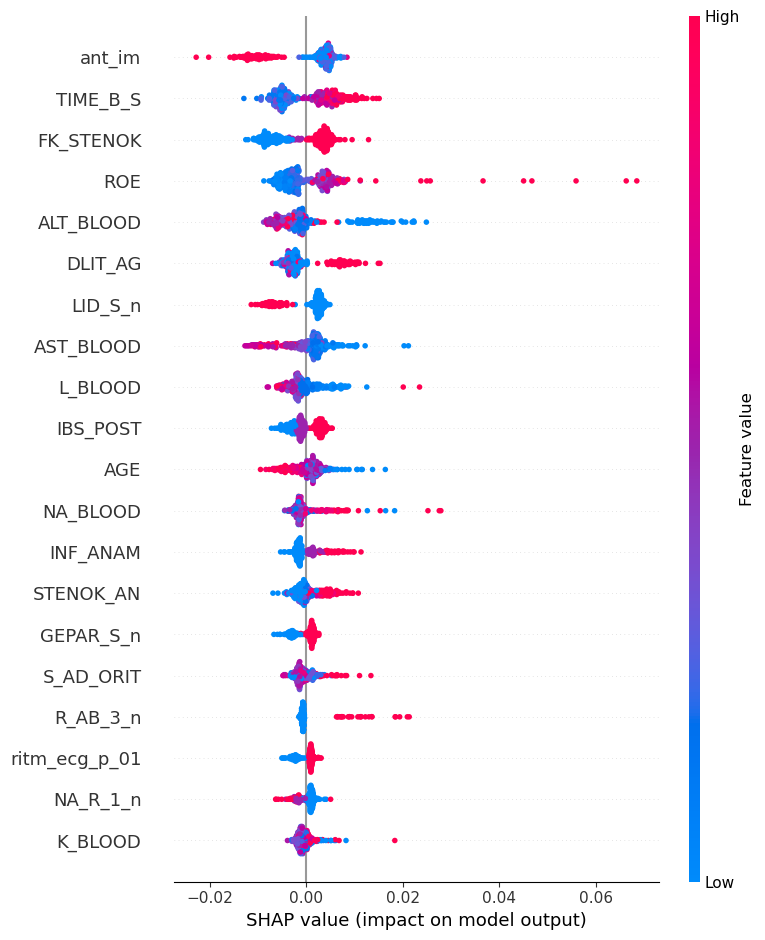

In [68]:
shap.summary_plot(shap_values[1], X_test)

In [69]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)